
# **MNIST Number Detection Using CNN Keras**

The MNIST database (Modified National Institute of Standards and Technology database) is a large collection of handwritten digits. It has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger NIST Special Database 3 (digits written by employees of the United States Census Bureau) and Special Database 1 (digits written by high school students) which contain monochrome images of handwritten digits

The MNIST dataset is a cornerstone dataset in the world of machine learning, especially for beginners venturing into image classification and Convolutional Neural Networks (CNNs).  Here's a breakdown of the MNIST dataset in TensorFlow:

**Content:**

* **Images:** The dataset is comprised of 70,000 small grayscale images, each measuring 28x28 pixels.
* **Labels:**  Each image corresponds to a handwritten digit (0-9), providing a labeled training set for image recognition tasks.

**Split:**

* **Training Set:** 60,000 images are allocated for training your machine learning model.
* **Test Set:** The remaining 10,000 images are used to assess the model's performance after training.

**Loading in TensorFlow:**

TensorFlow offers a straightforward way to load the MNIST dataset using the `tf.keras.datasets.mnist.load_data()` function. This function conveniently returns two separate NumPy arrays: one containing the training images and another containing the training labels. There's a similar function to load the test set as well.

**Uses:**

* The MNIST dataset is a popular choice for getting started with image classification using CNNs.
* Its simplicity allows you to grasp fundamental concepts like data preprocessing, model building, training, and evaluation.
* Once comfortable, you can progress to more intricate image datasets for real-world applications.

Here are some helpful resources to delve deeper into the MNIST dataset and how to use it with TensorFlow:

* TensorFlow Tutorial on MNIST Classification with CNNs: [https://www.kaggle.com/code/amyjang/tensorflow-mnist-cnn-tutorial](https://www.kaggle.com/code/amyjang/tensorflow-mnist-cnn-tutorial)
* TensorFlow Documentation on `tf.keras.datasets.mnist.load_data()`: [https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data)

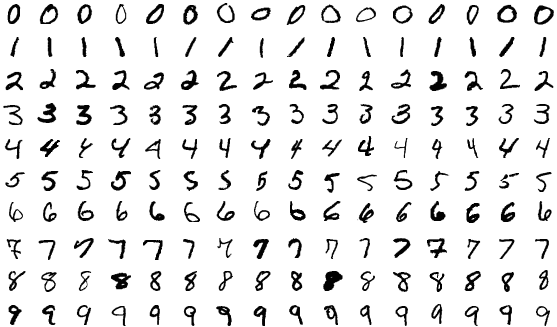

image source : https://en.wikipedia.org/wiki/MNIST_database#


The MNIST database contains 60,000 training images and 10,000 testing images.Half of the training set and half of the test set were taken from NIST's training dataset, while the other half of the training set and the other half of the test set were taken from NIST's testing dataset. The original creators of the database keep a list of some of the methods tested on it. In their original paper, they use a support-vector machine to get an error rate of 0.8%.

A grayscale (or gray) image and an RGB image are two different types of image representations based on how colors are encoded in the image.

1. **Grayscale Image**:
    - A grayscale image is a single-channel image, which means it contains only one layer of information.
    - Each pixel in a grayscale image represents a shade of gray, ranging from black (0) to white (255).
    - The image only contains intensity information and does not include color information.
    - Grayscale images are often used in image processing and computer vision tasks because they are computationally simpler and can highlight features more effectively.

2. **RGB Image**:
    - An RGB image is a three-channel image, representing red, green, and blue components for each pixel.
    - Each pixel contains a combination of red, green, and blue intensity values, ranging from 0 to 255 for each color.
    - By mixing different levels of these three primary colors, a wide range of colors can be created.
    - RGB images are more common in everyday use and are widely used in digital photography, graphic design, and web design.

In summary, the main difference between a grayscale image and an RGB image is the number of channels used to represent the image. Grayscale images use one channel (intensity), while RGB images use three channels (red, green, blue) to represent color information.

In [ ]:
#load the data
from tensorflow.keras.datasets import mnist

#use keras to import pre-shuffled mnist dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("training set of mnist dataset = %d" % len(X_train))
print("testing set of mnist dataset = %d" % len(X_test))


11490434/11490434 [==============================] - 0s 0us/step
training set of mnist dataset = 60000
testing set of mnist dataset = 10000


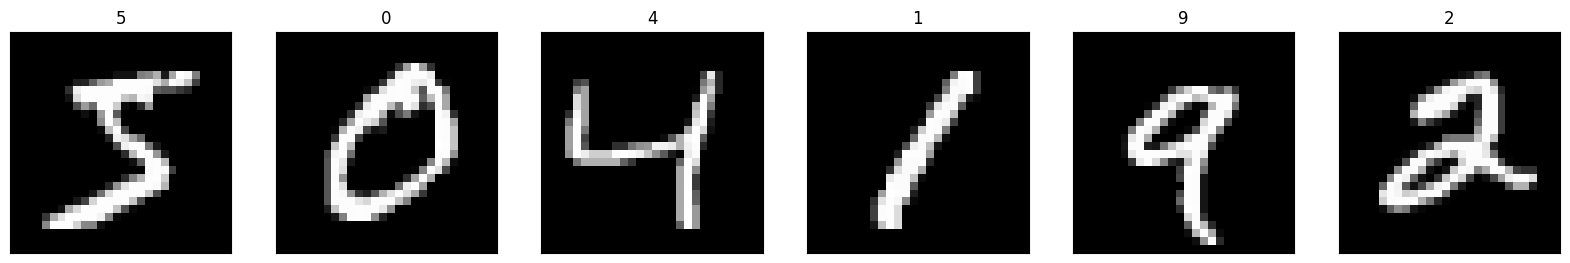

In [ ]:
#visulize the dataset

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

#plot first six training images
fig = plt.figure(figsize = (20, 20))

for i in range(6):
  ax = fig.add_subplot(1, 6, i+1, xticks = [], yticks = [])
  ax.imshow(X_train[i], cmap = "gray")
  ax.set_title(str(y_train[i]))

In [ ]:
len(y_train)

60000

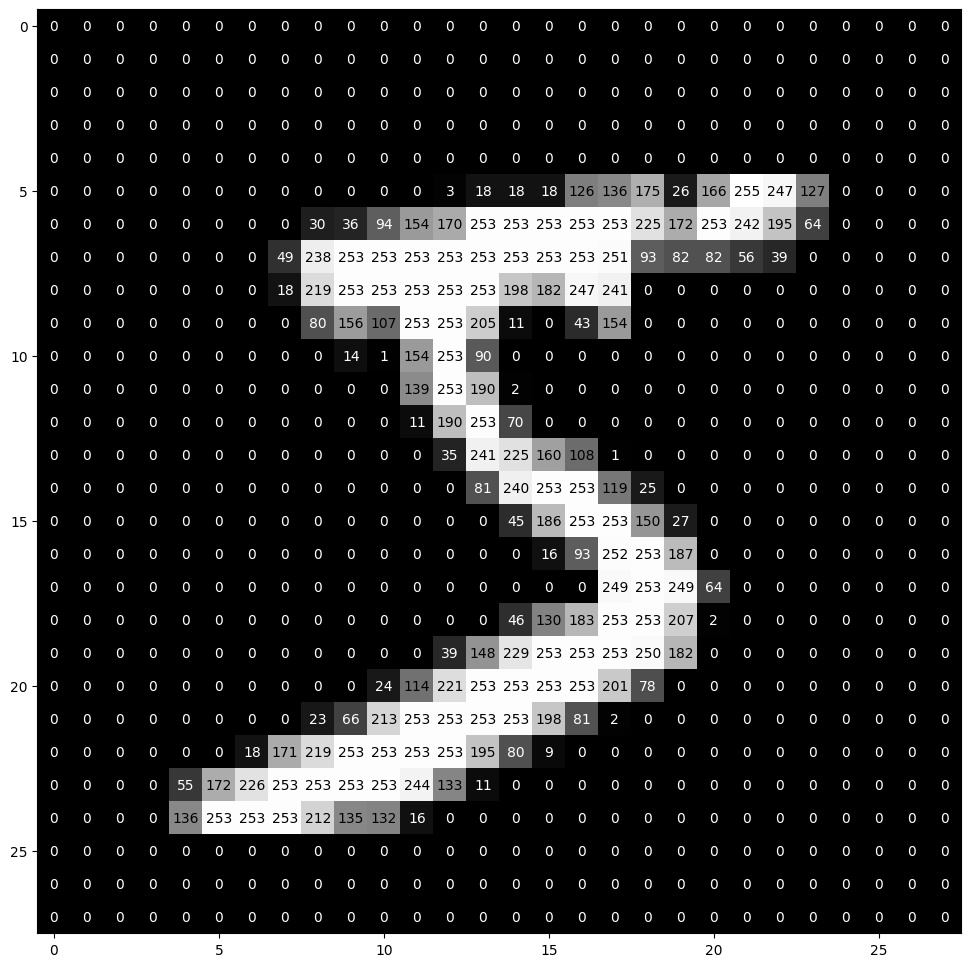

In [ ]:
#view an image in more details

def visualize_input(img, ax):
  ax.imshow(img, cmap = "gray")
  width, height = img.shape
  thresh = img.max()/2.5

  for x in range(width):
    for y in range(height):
      ax.annotate(str(round(img[x][y], 2)), xy = (y, x),
                  horizontalalignment = "center",
                  verticalalignment = "center",
                  color = "white" if img[x][y] < thresh else "black")
fig = plt.figure(figsize = (12, 12))
ax = fig.add_subplot(111)
visualize_input(X_train[0], ax)

In [ ]:
#process input image : rescale by dividing every pixel in every image by 255
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255

print("X_train shape : ", X_train.shape)
print(X_train.shape[0], "train sample")
print(X_test.shape[0], "test sample")

X_train shape :  (60000, 28, 28)
60000 train sample
10000 test sample


In [ ]:
pip install keras.utils

  Preparing metadata (setup.py) ... done
  Created wheel for keras.utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2631 sha256=420681e4164c923367ecaaed6d4316e45ee8992f7a79ce286f008da7e505e71c
  Stored in directory: /root/.cache/pip/wheels/5c/c0/b3/0c332de4fd71f3733ea6d61697464b7ae4b2b5ff0300e6ca7a
Successfully built keras.utils


In [ ]:
#preprocess the label : encode with One Hot Encoding(OHE)

from tensorflow.keras.utils import to_categorical
num_classes = 10
print("Integer Valued Labels : ")
print(y_train[:10])

#One Hot Encode the label by convert into binary class metrics
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

#print first ten OHE training labels
print("One Hot Encoded Labels: ")
print(y_train[:10])

Integer Valued Labels : 
[5 0 4 1 9 2 1 3 1 4]
One Hot Encoded Labels: 
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [ ]:
#reshape data to fit our CNN and input shape

#input image dimension 28X28 image
img_rows, img_cols = 28, 28

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

print("input shape : ", input_shape)
print("X_train shape : ", X_train.shape)

input shape :  (28, 28, 1)
X_train shape :  (60000, 28, 28, 1)


In [ ]:
#define the model architecture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D

#build the model
model = Sequential()

#Conv 1 : with ReLU activation and kernels = 32
model.add(Conv2D(32, kernel_size = (3, 3), padding = "same", activation = "relu", input_shape = (28, 28, 1)))
#Pool 1 : downsample the image to choose best features with pool size = 2X2
model.add(MaxPooling2D(pool_size = (2, 2)))

#Conv 2 : with ReLU activation and kernels = 64
model.add(Conv2D(64, kernel_size = (3, 3), padding = "same", activation = "relu"))
#Pool 2 : downsample the image to choose best features with pool size = 2X2
model.add(MaxPooling2D(pool_size = (2, 2)))

#flatten for classfication output
model.add(Flatten())

#FC 1: fully connected layer to get relevent data with 64 kernels/filters
model.add(Dense(64, activation = "relu"))

#FC 2: output a softmax into 10 classes
model.add(Dense(10, activation = "softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 64)                2

In [ ]:
#compile the model
model.compile(loss = "categorical_crossentropy",
              optimizer = "rmsprop",
              metrics = ["accuracy"])

In [ ]:
#train the model
from tensorflow.keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath = "model.weights.best.hdf5", verbose = 1,
                               save_best_only = True)

hist = model.fit(X_train, y_train, batch_size = 64, epochs = 10,
                 validation_data = (X_test, y_test), callbacks = [checkpointer],
                 verbose = 2, shuffle = True)

Epoch 1/10

Epoch 1: val_loss improved from inf to 0.04634, saving model to model.weights.best.hdf5
938/938 - 10s - loss: 0.1639 - accuracy: 0.9491 - val_loss: 0.0463 - val_accuracy: 0.9837 - 10s/epoch - 11ms/step
Epoch 2/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 0.04634 to 0.04048, saving model to model.weights.best.hdf5
938/938 - 4s - loss: 0.0467 - accuracy: 0.9857 - val_loss: 0.0405 - val_accuracy: 0.9860 - 4s/epoch - 4ms/step
Epoch 3/10

Epoch 3: val_loss improved from 0.04048 to 0.03808, saving model to model.weights.best.hdf5
938/938 - 3s - loss: 0.0314 - accuracy: 0.9904 - val_loss: 0.0381 - val_accuracy: 0.9876 - 3s/epoch - 3ms/step
Epoch 4/10

Epoch 4: val_loss improved from 0.03808 to 0.02675, saving model to model.weights.best.hdf5
938/938 - 3s - loss: 0.0237 - accuracy: 0.9927 - val_loss: 0.0268 - val_accuracy: 0.9917 - 3s/epoch - 3ms/step
Epoch 5/10

Epoch 5: val_loss did not improve from 0.02675
938/938 - 4s - loss: 0.0171 - accuracy: 0.9949 - val_loss: 0.0364 - val_accuracy: 0.9882 - 4s/epoch - 4ms/step
Epoch 6/10

Epoch 6: val_loss did not improve from 0.02675
938/938 - 4s - loss: 0.0136 - accuracy: 0.9956 - val_loss: 0.0310 - val_accuracy: 0.9911 - 4s/epoch - 4ms/step
Epoch 7/10

Epoch 7: val_l

In [ ]:
#load the model
model.load_weights("/content/model.weights.best.hdf5")

In [ ]:
#calculate the accuracy on test set
score = model.evaluate(X_test, y_test, verbose = 0)
accuracy = 100 * score[1]

print("accuracy : %.2f%%" % accuracy)

accuracy : 99.17%
